## Práctica PCA

En esta práctica vamos a estar trabajando con data del [Departamento de Agricultura de Estados Unidos](https://fdc.nal.usda.gov/). En este dataset encontraremos información detallada de la composición nutricional de gran número de alimentos.

Los objetivos de la práctica son:


1.   Realizar un PCA a partir de las variables numéricas del dataset quedándose con la cantidad de PC necesarios para abarcar el 80% de la varianza de los datos.
2.   Determinar las variables más importantes para los primeros PC.
3.   Graficar las observaciones en la proyección de las dos primeras componentes principales.
4.   Realizar análisis de clustering K-Means a partir de los datos originales y de los datos transformados por PCA, con k = 25. Comparar los resultados según distintos métodos de validación.


In [ ]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/n6j74yozbguguwtmy6v6uaxdsniz4j?dws=00000')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
!pip install kneed

# Exploracion y preprocesamiento

In [ ]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [ ]:

columnas_object = df.select_dtypes(exclude=['float64'])

df = df.drop(columns=columnas_object)



In [ ]:
df.isna().sum()

Energy_kcal         0
Protein_g           0
Fat_g               0
Carb_g              0
Sugar_g             0
Fiber_g             0
VitA_mcg            0
VitB6_mg            0
VitB12_mcg          0
VitC_mg             0
VitE_mg             0
Folate_mcg          0
Niacin_mg           0
Riboflavin_mg       0
Thiamin_mg          0
Calcium_mg          0
Copper_mcg          0
Iron_mg             0
Magnesium_mg        0
Manganese_mg        0
Phosphorus_mg       0
Selenium_mcg        0
Zinc_mg             0
VitA_USRDA          0
VitB6_USRDA         0
VitB12_USRDA        0
VitC_USRDA          0
VitE_USRDA          0
Folate_USRDA        0
Niacin_USRDA        0
Riboflavin_USRDA    0
Thiamin_USRDA       0
Calcium_USRDA       0
Copper_USRDA        0
Magnesium_USRDA     0
Phosphorus_USRDA    0
Selenium_USRDA      0
Zinc_USRDA          0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df1 = pd.DataFrame(scaled, columns= df.columns)
df1.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,...,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03
mean,5.153043e-18,-2.803255e-17,4.946921e-18,-1.871585e-16,-1.896320e-17,-2.308563e-17,4.122434e-19,9.316701e-17,5.153043e-17,-1.896320e-17,...,-4.946921e-18,-3.668966e-17,-5.771408e-18,-1.484076e-17,8.244868e-19,-1.401628e-17,3.009377e-17,-9.151804e-17,-3.297947e-18,6.101202e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,...,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-1.336875e+00,-1.092316e+00,-6.710831e-01,-8.010694e-01,-4.823251e-01,-4.690575e-01,-1.205784e-01,-5.523961e-01,-2.836951e-01,-1.376425e-01,...,-2.696658e-01,-7.057001e-01,-5.273895e-01,-4.048643e-01,-3.645921e-01,-3.113473e-01,-5.840575e-01,-7.680973e-01,-4.459042e-01,-5.867199e-01
25%,-7.878105e-01,-8.581924e-01,-6.085257e-01,-7.996008e-01,-4.823251e-01,-4.690575e-01,-1.205784e-01,-4.808312e-01,-2.836951e-01,-1.376425e-01,...,-2.696658e-01,-6.266813e-01,-4.251341e-01,-3.469871e-01,-3.198943e-01,-2.570997e-01,-4.056937e-01,-5.859044e-01,-4.423695e-01,-5.182271e-01
50%,-2.092266e-01,-3.070064e-01,-3.411205e-01,-4.726609e-01,-4.551218e-01,-3.995071e-01,-1.186536e-01,-3.016577e-01,-2.651720e-01,-1.376425e-01,...,-2.321423e-01,-2.713034e-01,-1.939479e-01,-2.553482e-01,-2.702300e-01,-1.684954e-01,-2.273300e-01,-1.131876e-01,-3.080498e-01,-3.350833e-01
75%,6.468413e-01,8.012898e-01,2.050355e-01,4.068277e-01,-9.265674e-02,8.734553e-02,-9.363172e-02,1.893718e-01,1.672638e-02,-9.422425e-02,...,-1.356533e-01,3.346282e-01,5.057598e-02,2.535613e-02,-5.667363e-02,-4.960282e-02,-6.680259e-02,2.955154e-01,3.069932e-01,2.173259e-01
max,3.988458e+00,7.279266e+00,5.631928e+00,2.870350e+00,6.855204e+00,1.784588e+01,3.837467e+01,2.452145e+01,2.261317e+01,4.154392e+01,...,3.125542e+01,2.566838e+01,3.837413e+01,4.469111e+01,3.620818e+01,2.690284e+01,1.334615e+01,4.806945e+01,6.731487e+01,2.649771e+01


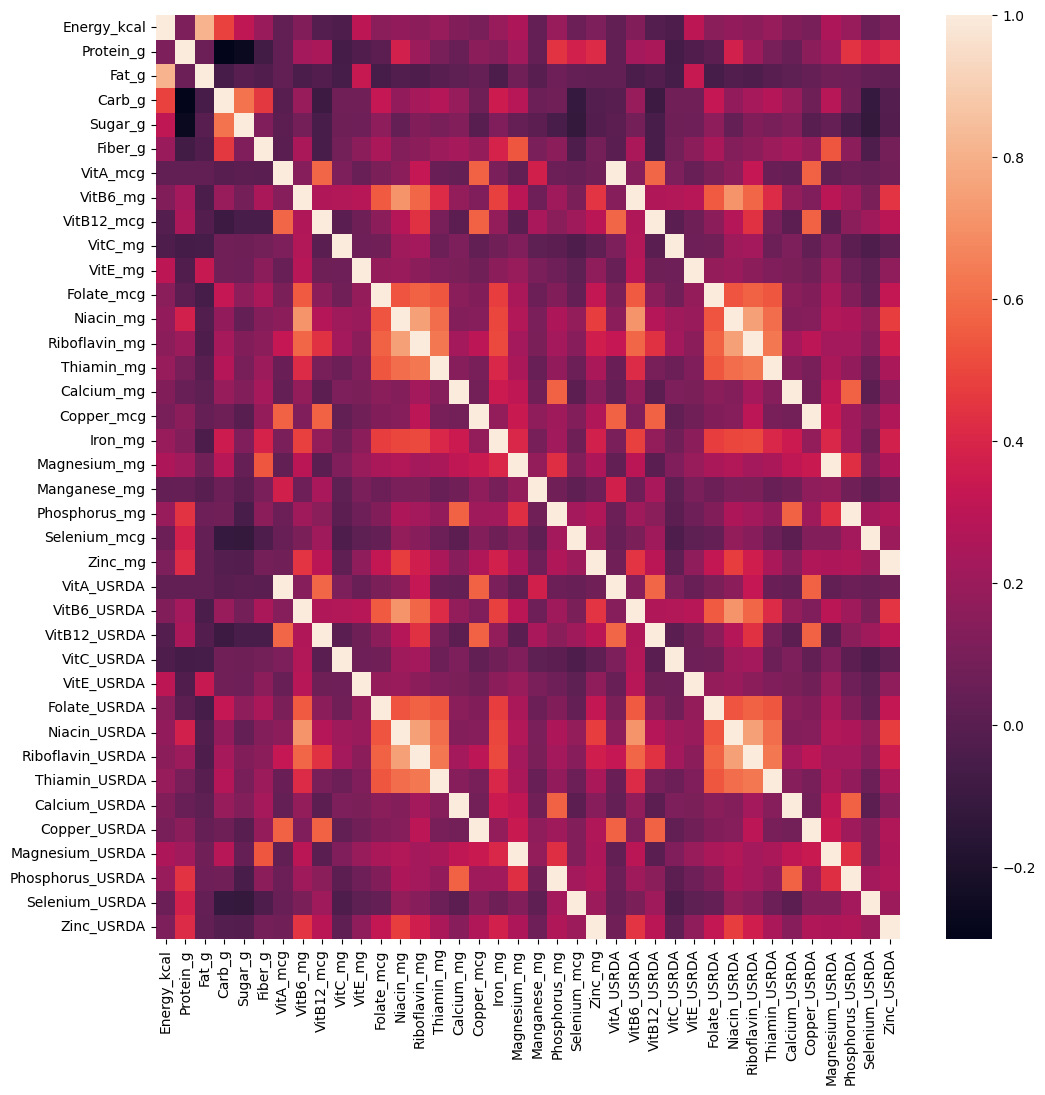

In [ ]:
#Covarianza
c = df1.cov()

# Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(c)
plt.show()

In [ ]:
df1 = df1.drop(columns=['Zinc_USRDA','Selenium_USRDA','Phosphorus_USRDA','Magnesium_USRDA','Copper_USRDA','Calcium_USRDA',
               'Thiamin_USRDA','Riboflavin_USRDA','Niacin_USRDA','Folate_USRDA','VitA_USRDA', 'VitB6_USRDA','VitB12_USRDA','VitC_USRDA', 'VitE_USRDA'])

# PCA

1.

In [ ]:
# PCA
pca = PCA(n_components=0.80) #especificamos el porcentaje de varianza explicada en la suma de los componentes
X_pca = pca.fit_transform(df1)

# Convertimos el resultado en un dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.121776,-1.182251,-3.661940,1.080920,-3.084161,0.838022,0.331073,-0.554879,-0.620704,1.426270
1,-1.114687,-1.184173,-3.662329,1.090738,-3.077430,0.837098,0.323428,-0.551897,-0.630773,1.432207
2,-0.994919,-1.573580,-4.697724,1.317311,-3.912684,0.940208,0.373919,-0.538498,-0.697954,1.763517
3,0.235910,0.566070,-1.905054,-0.834509,0.438104,0.051566,1.709057,-1.160471,-0.395269,0.275188
4,0.300785,0.537659,-2.307570,-0.903853,0.875466,0.014515,2.158001,-1.460309,-0.483304,0.282587
...,...,...,...,...,...,...,...,...,...,...
8613,0.558544,1.975874,-1.666600,-0.074932,-0.587638,-0.281507,0.219456,0.724308,0.368972,-0.269405
8614,-0.762069,1.320084,-0.261346,-0.794780,0.891083,-0.217528,0.246546,-0.064162,0.206560,-0.070058
8615,-0.767671,-3.267656,0.985206,1.935610,-0.172483,-2.305347,1.385151,0.760900,0.847249,-1.951013
8616,0.355897,0.678435,-1.002936,-0.665888,1.814791,1.048642,-1.305073,0.672780,0.014696,-0.115736


2. Para conocer cuales son las variables más importantes en los primeros componentes, veamos la tabla de loadings:

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=df1.columns,
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Energy_kcal,0.157814,-0.273449,-0.462006,0.052280,-0.293596,-0.132865,0.066823,0.074407,0.041548,0.141091
Protein_g,0.140620,0.343397,-0.213567,-0.311112,0.013176,-0.141469,0.006299,0.116309,0.148471,0.018356
Fat_g,0.033008,-0.111670,-0.534051,0.026520,-0.394450,0.116492,0.045318,-0.049585,-0.091602,0.200694
Carb_g,0.169685,-0.443416,0.049822,0.174108,0.082723,-0.279369,0.022079,0.155082,0.117823,-0.043978
Sugar_g,0.076323,-0.358769,0.055247,0.217373,-0.048421,-0.337022,0.298613,0.143511,0.151122,-0.388018
Fiber_g,0.181570,-0.257733,-0.040397,0.042130,0.332161,0.134870,-0.414733,0.187809,-0.065757,0.086563
VitA_mcg,0.133519,0.236470,-0.021929,0.530395,0.008137,0.039028,0.101341,-0.046231,-0.021982,0.118087
VitB6_mg,0.315663,0.021129,0.174648,-0.114372,-0.133747,0.200525,0.024691,0.083253,0.022972,-0.198085
VitB12_mcg,0.177985,0.355045,-0.012760,0.346550,-0.058857,-0.123150,0.056077,0.004506,-0.132134,-0.133190
VitC_mg,0.087639,-0.038525,0.162303,0.047584,0.024713,0.545219,0.451276,0.515944,0.085537,0.155506


Text(0.5, 1.0, 'Principal Component 1 - Loadings')

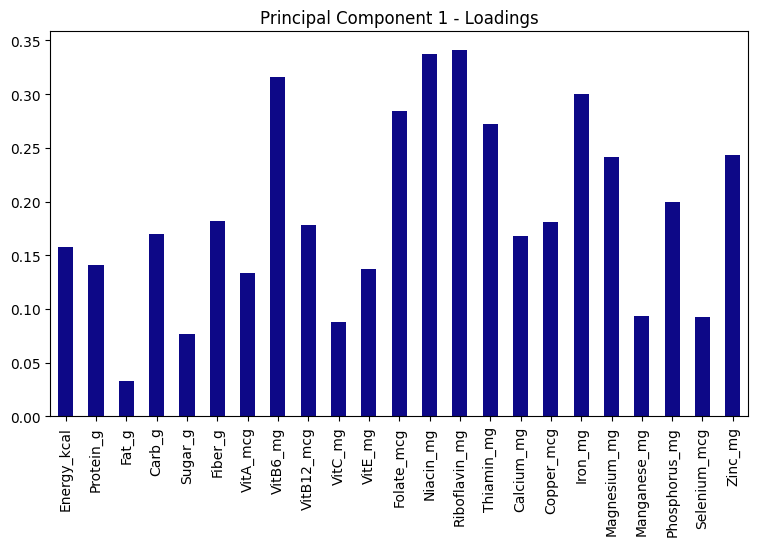

In [ ]:
import matplotlib as mpl
loadings['PC1'].plot(kind='bar', figsize=(9,5), cmap= 'plasma')
plt.title('Principal Component 1 - Loadings')

Text(0.5, 1.0, 'PC1 - 10 loadings con mayor coeficiente')

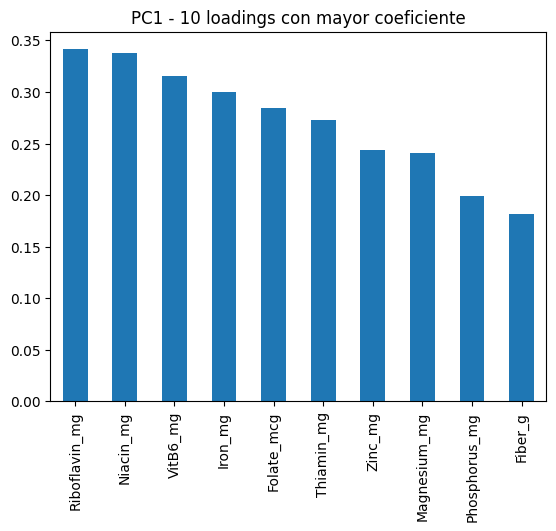

In [ ]:
PC1Sort = loadings['PC1'].abs().sort_values(ascending=False).head(10)
PC1Sort.plot(kind='bar')
plt.title('PC1 - 10 loadings con mayor coeficiente')


Text(0.5, 1.0, 'PC2 - 10 loadings con mayor coeficiente')

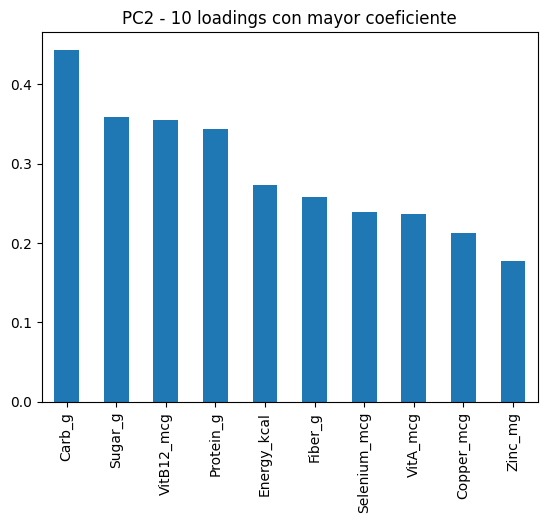

In [ ]:
PC2Sort = loadings['PC2'].abs().sort_values(ascending=False).head(10)
PC2Sort.plot(kind='bar')
plt.title('PC2 - 10 loadings con mayor coeficiente')

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", title="% Varianza Explicada", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", title="% Varianza Acumulada", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Varianza Explicada'}, xlabel='Componente'>,
       <Axes: title={'center': '% Varianza Acumulada'}, xlabel='Componente'>],
      dtype=object)

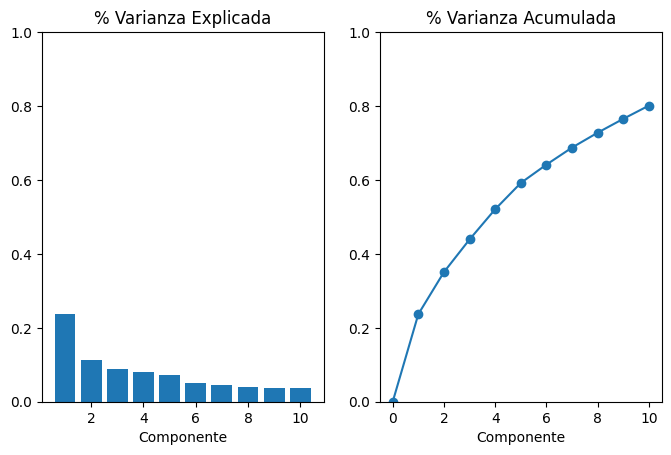

In [ ]:
# Look at explained variance
plot_variance(pca)

# Graficando PC1 y PC2

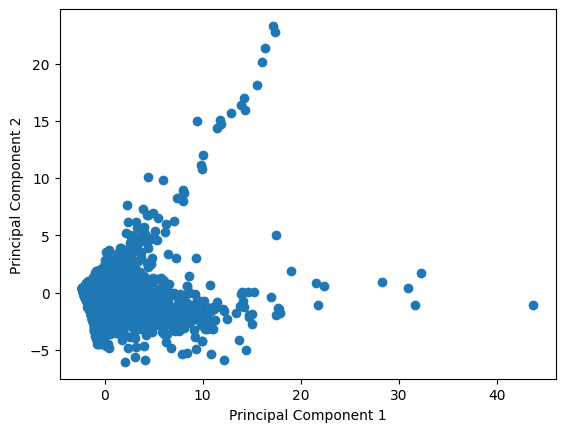

In [ ]:
plt.scatter(X_pca['PC1'], X_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
scalePC1 = 1.0/(X_pca['PC1'].max() - X_pca['PC1'].min())
scalePC2 = 1.0/(X_pca['PC2'].max() - X_pca['PC2'].min())
ldngs = pca.components_
features = df1.columns

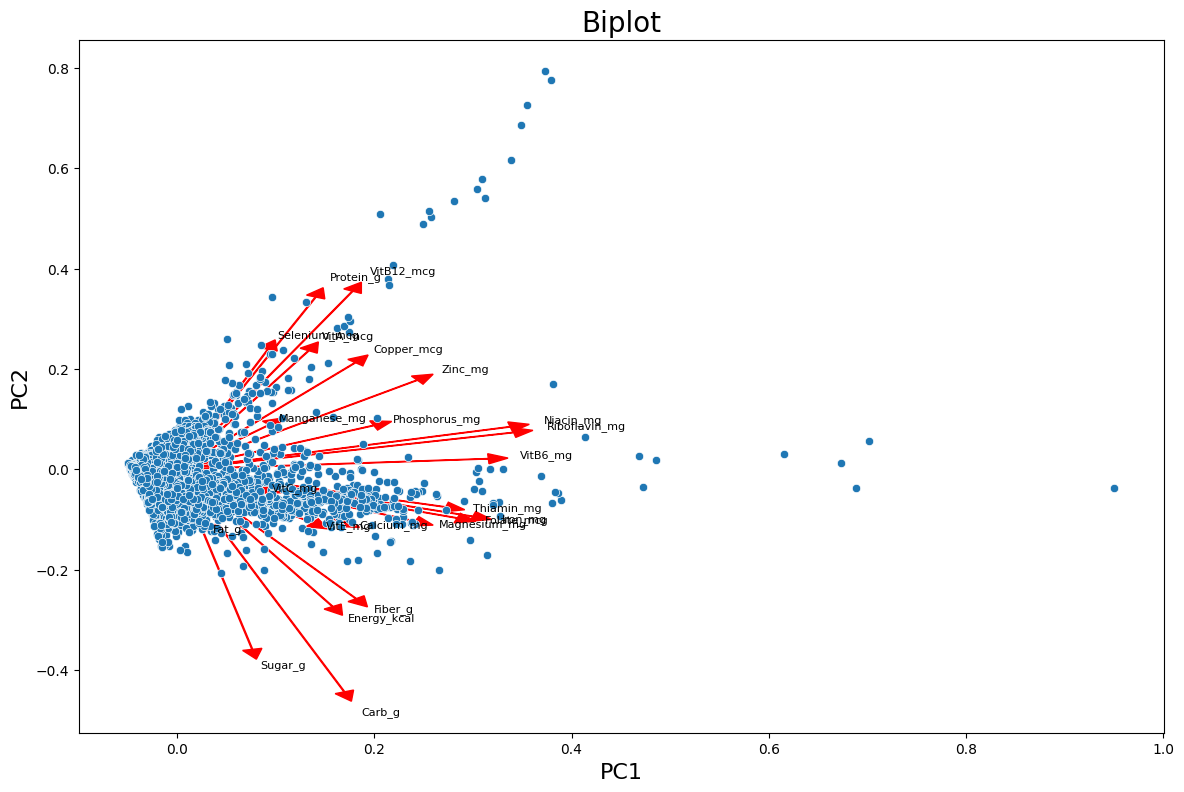

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tamaño de la figura
plt.figure(figsize=(14, 9))

# Dibuja las flechas y etiquetas
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i], head_width=0.02, head_length=0.02, fc='r', ec='r')
    plt.text(ldngs[0, i] * 1.1, ldngs[1, i] * 1.1, feature, fontsize=8)

# Gráfico de dispersión con etiquetas
sns.scatterplot(x=X_pca['PC1'] * scalePC1, y=X_pca['PC2'] * scalePC2)

# Etiquetas de ejes y título
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('Biplot', fontsize=20)

# Muestra el gráfico
plt.show()


# K-means

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# SSE: Sum of Square Error
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

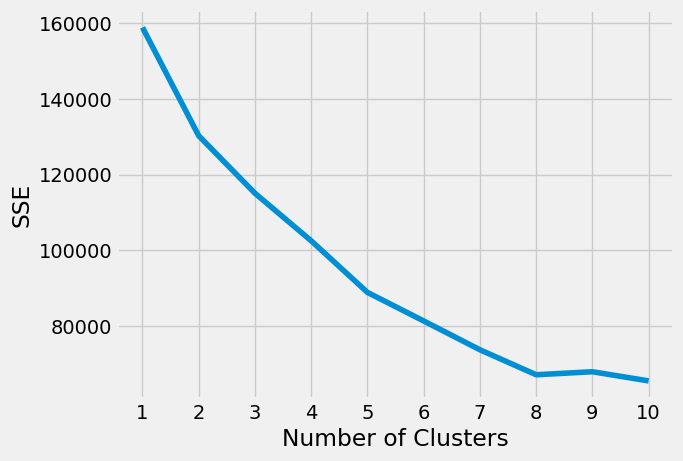

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [ ]:
kmeans_5 = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans_5.fit(X_pca)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

In [ ]:
df1['kmeans(5)'] = kmeans_5.labels_

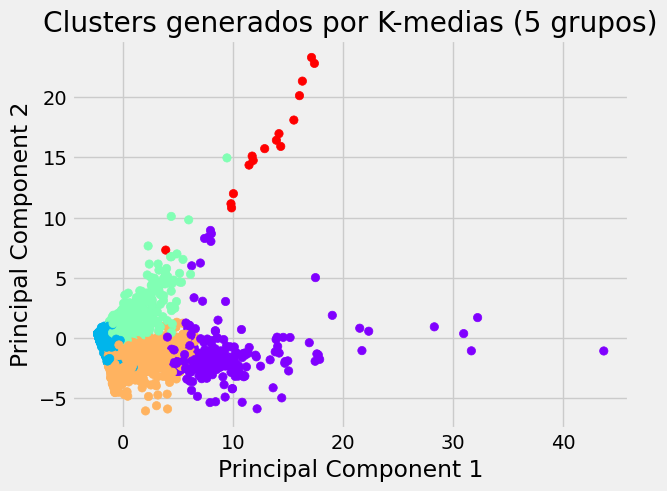

In [ ]:
# Crear un scatter plot de los datos con colores según los clusters
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=df1['kmeans(5)'], cmap='rainbow')
plt.title('Clusters generados por K-medias (5 grupos)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()